In [2]:
import manim

Manim Community v0.16.0.post0

In [35]:
from manim import *

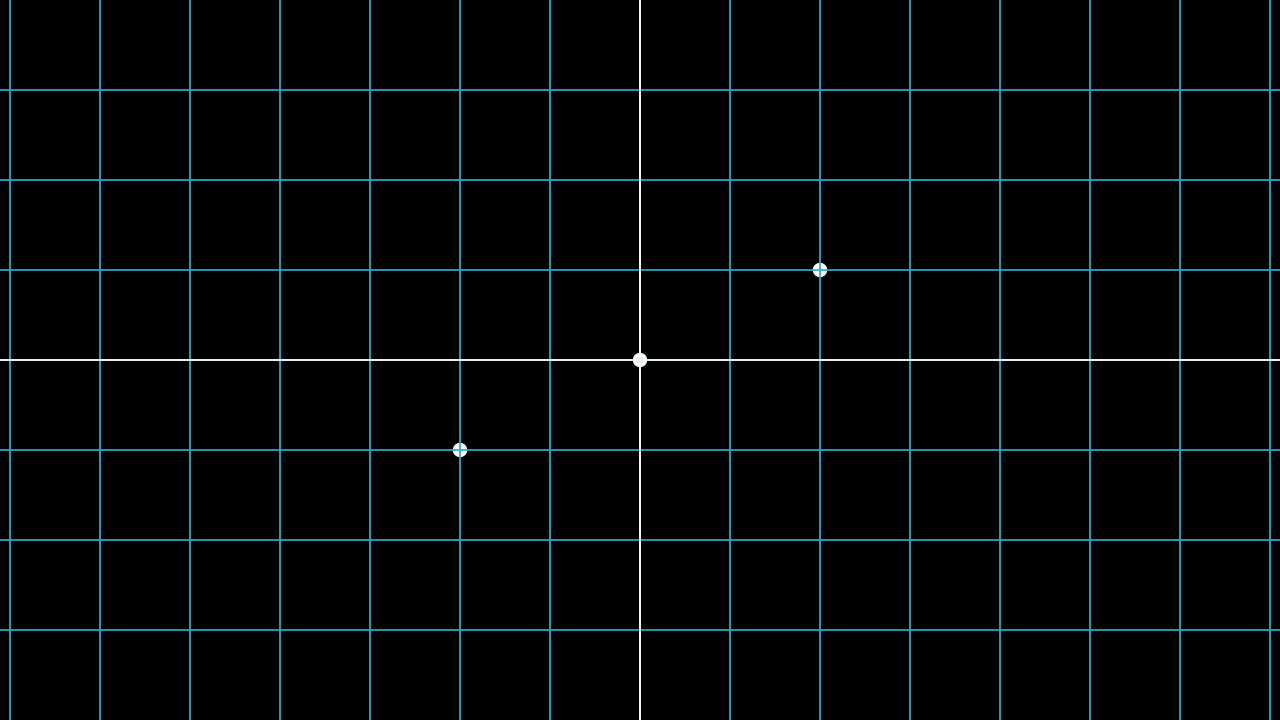

In [11]:
class Dots(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        dot3 = Dot([0,0,3])
        
        numberplane = NumberPlane()
        self.add(dot, dot2, dot3, numberplane)
        
# don't remove below command for run button to work
%manim -qm -v WARNING Dots

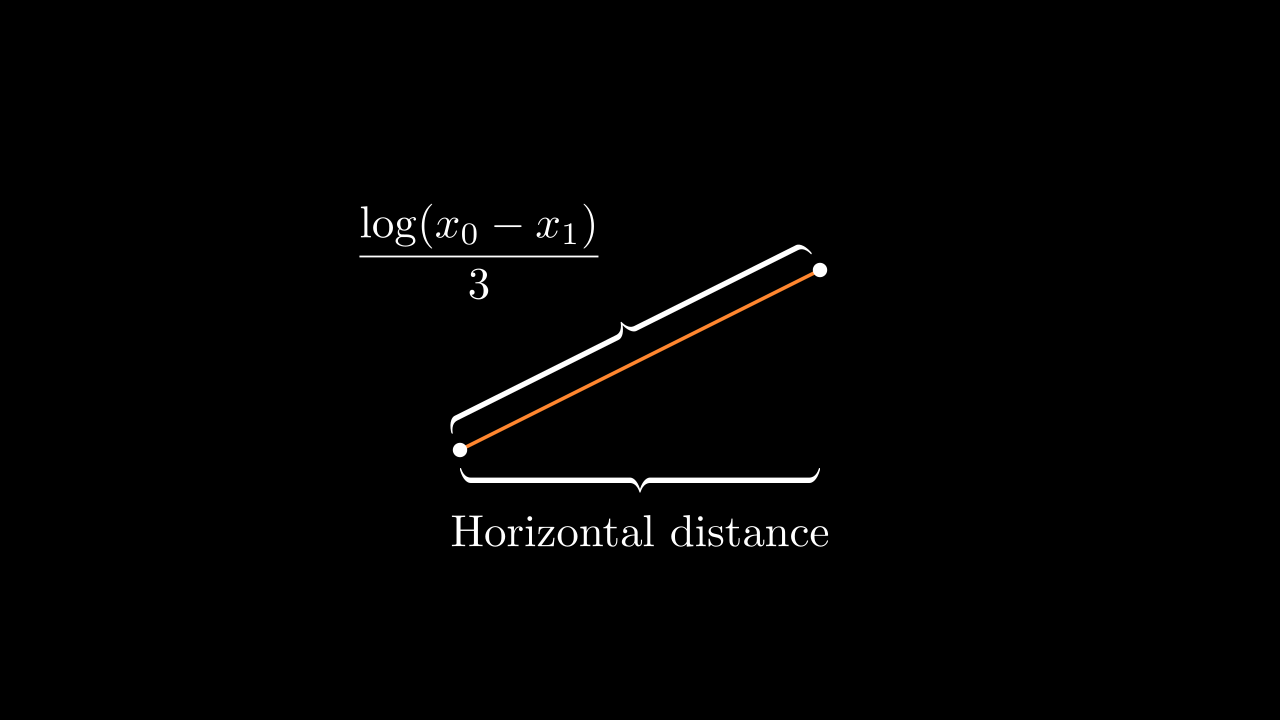

In [23]:
class BraceAnnotation(Scene):
    def construct(self):
        dot = Dot([-2, -1, 0])
        dot2 = Dot([2, 1, 0])
        
        line = Line(dot.get_center(), dot2.get_center()).set_color(ORANGE)
        b1 = Brace(line)
        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector())
        
        b1text = b1.get_text("Horizontal distance")
        b2text = b2.get_tex("\\frac{\\log(x_0-x_1)}{3}")
        
        self.add(line, dot, dot2, b1, b2, b1text, b2text)
        
%manim -qm -v WARNING BraceAnnotation

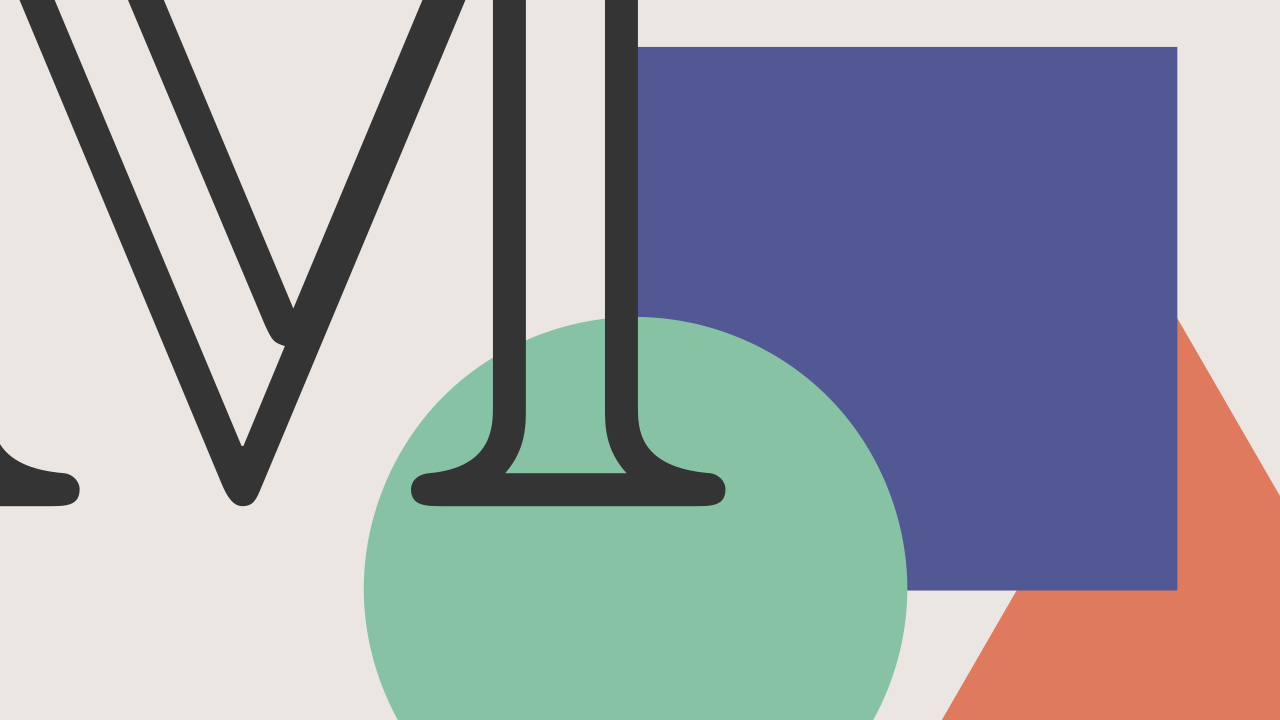

In [30]:

class ManimCELogo(Scene):
    def construct(self):
        self.camera.background_color = "#ece6e2"
        logo_green = "#87c2a5"
        logo_blue = "#525893"
        logo_red = "#e07a5f"
        logo_black = "#343434"
        ds_m = MathTex(r"\mathbb{M}", fill_color=logo_black).scale(7)
        
        ds_m.shift(2.25 * LEFT + 1.5 * UP)
        circle = Circle(color=logo_green, fill_opacity=1).shift(LEFT)
        square = Square(color=logo_blue, fill_opacity=1).shift(UP)
        triangle = Triangle(color=logo_red, fill_opacity=1).shift(RIGHT)
        
        logo = VGroup(triangle, square, circle, ds_m)  # order matters
        logo.move_to(ORIGIN)
        
        logo.scale(3)
        self.add(logo)
        
%manim -qm -v WARNING ManimCELogo

In [32]:
class MovingCameraOnGraph(MovingCameraScene):
    def construct(self):
        self.camera.frame.save_state()

        ax = Axes(x_range=[-1, 10], y_range=[-1, 10])
        graph = ax.plot(lambda x: np.sin(x), color=WHITE, x_range=[0, 3 * PI])

        dot_1 = Dot(ax.i2gp(graph.t_min, graph))
        dot_2 = Dot(ax.i2gp(graph.t_max, graph))
        self.add(ax, graph, dot_1, dot_2)
        
        self.play(self.camera.frame.animate.scale(0.5).move_to(dot_1))
        self.play(self.camera.frame.animate.move_to(dot_2))
        self.play(Restore(self.camera.frame))
        self.wait()
        
%manim -qm -v WARNING MovingCameraOnGraph

In [41]:
class GraphExample(Scene):
    def construct(self):
        # the graph class expects a list of vertices and edges
        vertices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
        edges = [(1, 2), (2, 3), (3, 4), (2, 4), (2, 5), (6, 5),
                 (1, 7), (5, 7), (2, 8), (1, 9), (10, 8), (5, 11)]

        # we're using the layout_config's seed parameter to deterministically set the
        # vertex positions (it is otherwise set randomly)
        g = Graph(vertices, edges, layout_config={"seed": 0}).scale(1.6)
        self.play(Write(g))
        self.wait()
        # the graph contains updaters that align edges with their vertices
        self.play(g.vertices[6].animate.shift((LEFT + DOWN) * 0.5))
        self.wait()
        
        self.play(g.animate.shift(LEFT * 3))
        self.wait()
        
%manim -qm -v WARNING GraphExample

In [45]:
class MovingFrameBox(Scene):
    def construct(self):
        text=MathTex(
            "\\frac{d}{dx}f(x)g(x)=",
            "f(x)\\frac{d}{dx}g(x)",
            "+",
            "g(x)\\frac{d}{dx}f(x)sin(x)"
        )
        self.play(Write(text))
        
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(
            Create(framebox1),
        )
        self.wait()

        self.play(
            ReplacementTransform(framebox1,framebox2),
        )
        self.wait()
        
%manim -qm -v WARNING MovingFrameBox